In [7]:
import qiskit
import pennylane as qml 
import matplotlib.pyplot as plt 

In [8]:
# 1. Define un dispositivo (usaremos 3 qubits, como en la imagen)
dev = qml.device("default.qubit", wires=3)

# 2. Define tu circuito como una "función" (QNode)
@qml.qnode(dev)
def my_circuit(theta, phi):
    # #################
    # # TU CÓDIGO AQUÍ #
    # #################
    
    # REORDENAMOS LAS 5 COMPUERTAS PARA QUE COINCIDAN:
    # Leemos el circuito de la imagen de izquierda a derecha.

    # Capa 1 (las dos compuertas de la izquierda)
    qml.CNOT(wires=[0, 1])   # CNOT del qubit 0 al 1
    qml.RX(theta, wires=2) # Rotación Rx en el qubit 2

    # Capa 2 (la CNOT del 0 al 2)
    qml.CNOT(wires=[0, 2])   # CNOT del qubit 0 al 2

    # Capa 3 (la Hadamard)
    qml.Hadamard(wires=0)    # Hadamard en el qubit 0

    # Capa 4 (la CNOT del 0 al 1)
    qml.CNOT(wires=[0, 1])   # CNOT del qubit 0 al 1

    # Capa 5 (la rotación Ry)
    qml.RY(phi, wires=1)     # Rotación Ry en el qubit 1
    
    # Esto es lo que devuelve el circuito (probabilidades de todos los 3 qubits)
    return qml.probs(wires=[0, 1, 2])

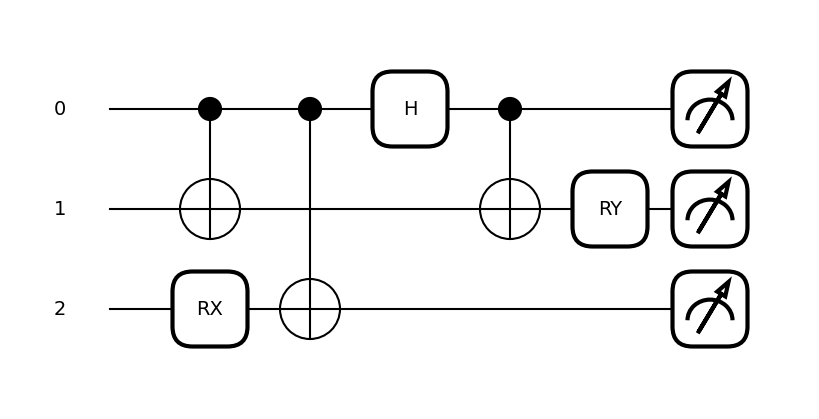

In [9]:
# --- Para dibujar el circuito ---

# Necesitamos darle valores de ejemplo a theta y phi, solo para dibujarlo
theta = 1.23
phi = 4.56

# Esta es la función mágica para el dibujo "lindo"
fig, ax = qml.draw_mpl(my_circuit)(theta, phi)
plt.show()